In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform

# Functions to turn on and off custom plotting
def default_mplstyle():
    mpl.rcParams.update(mpl.rcParamsDefault)
    
def custom_mplstyle():
    mpl.style.use("../plot_style.txt")
    
def ylabel_with_offset(ax, label):
    ax.yaxis.offsetText.set_visible(False)
    offset = ax.yaxis.get_major_formatter().get_offset()
    ax.set_ylabel(r"{} {}".format(label, offset))
    
    
%load_ext autoreload
%autoreload 2

Data from the Julia integrator:

In [5]:
runID = "01"


Xgeos = np.load("../data/{}Xgeos.npy".format(runID))
Xgshes = np.load("../data/{}Xgshes.npy".format(runID))
epsilons = np.load("../data/{}Epsilons.npy".format(runID))
fit_gshe_geodesic = np.load("../data/{}Fit_gshe_geodesic.npy".format(runID))
fit_gshe_gshe = np.load("../data/{}Fit_gshe_gshe.npy".format(runID))
x = np.load("../data/{}VaryParam.npy".format(runID))

# k = 80
# print(x[k]/np.pi)

# Xgeo = Xgeos[k, ...]
# Xgshe = Xgshes[k, ...]

<IPython.core.display.Javascript object>


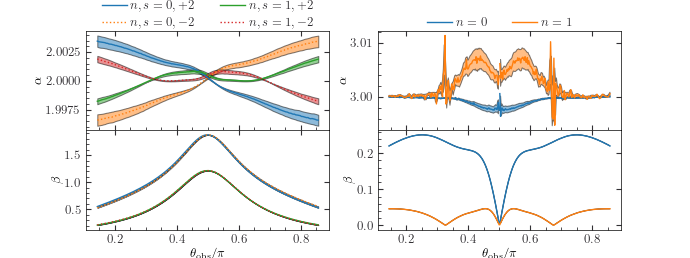

In [90]:
custom_mplstyle()
window_length = 3
polyorder = 1
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(3.45*2, 3.45*0.75), sharex='col')
fig.subplots_adjust(hspace=0, wspace=0.2)


for n in range(2):
    for s in range(2):
        for par in range(2):
            mu = fit_gshe_geodesic[:, n, s, par, 0]
            std = fit_gshe_geodesic[:, n, s, par, 1]
            lower = savgol_filter(mu - std, window_length, polyorder)
            upper = savgol_filter(mu + std, window_length, polyorder)
            
            if par == 0:
                label = r"$n, s = {},{}$".format(n, polardict[s])
            else:
                label = None

            axes[par, 0].plot(x/np.pi, mu, label=label, ls=polarls[s])
            axes[par, 0].fill_between(x/np.pi, lower, upper, alpha=0.5)


for n in range(2):
    for par in range(2):
        mu = fit_gshe_gshe[:, n, par, 0]
        std = fit_gshe_gshe[:, n, par, 1]
        lower = savgol_filter(mu - std, window_length, polyorder)
        upper = savgol_filter(mu + std, window_length, polyorder)
        
        if par == 0:
            label = r"$n = {}$".format(n)
        else:
            label = None

        axes[par, 1].plot(x/np.pi, mu, label=label)
        axes[par, 1].fill_between(x/np.pi, lower, upper, alpha=0.5)

        
        
for i in range(2):
    axes[1, i].set_xlabel(r"$\theta_{\rm obs} / \pi$")
    axes[0, i].set_ylabel(r"$\alpha$")
    axes[1, i].set_ylabel(r"$\beta$")
    
    
axes[0, 0].legend(ncol=2, loc=9, bbox_to_anchor=(0.5, 1.42))
axes[0, 1].legend(ncol=2, loc=9, bbox_to_anchor=(0.5, 1.25))
# 
fig.savefig("/Users/richard/Downloads/powerlaw_fit.pdf", dpi=400, bbox_inches="tight") 
fig.show()